Task 2 : Movie Rating Prediction with Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression


In [3]:
# Load the dataset with a different encoding
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [4]:
file_path = 'IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [5]:
# Replacing missing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [6]:
# Feature Engineering
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = pd.get_dummies(df[features])
y = df['Rating']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluating the model
ms = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {ms}')

Mean Squared Error: 1.8002183453961824e+25


Text(0.5, 1.0, 'Actual vs. Predicted Ratings')

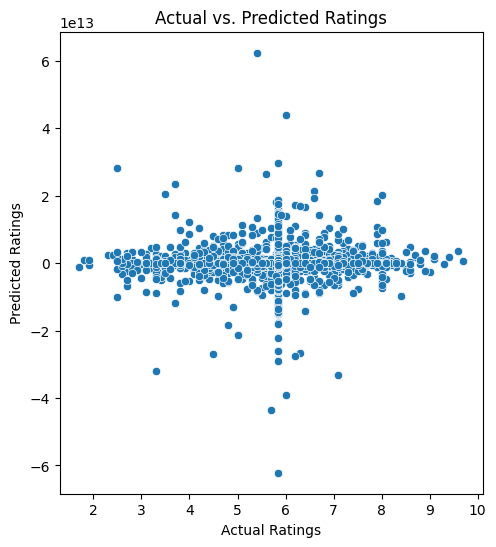

In [12]:
# Visualizing predicted and actual ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')

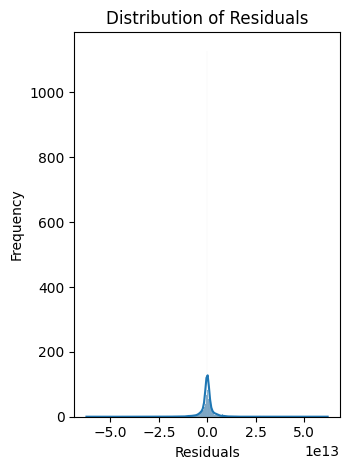

In [13]:
# Visualizing residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

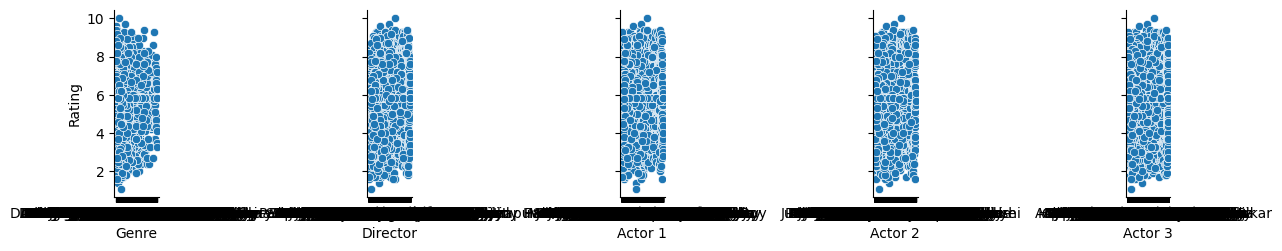

In [14]:
# Visualizations
# 1. Pairplot to visualize relationships between features and ratings
sns.pairplot(df, x_vars=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], y_vars='Rating', kind='scatter')
plt.show()

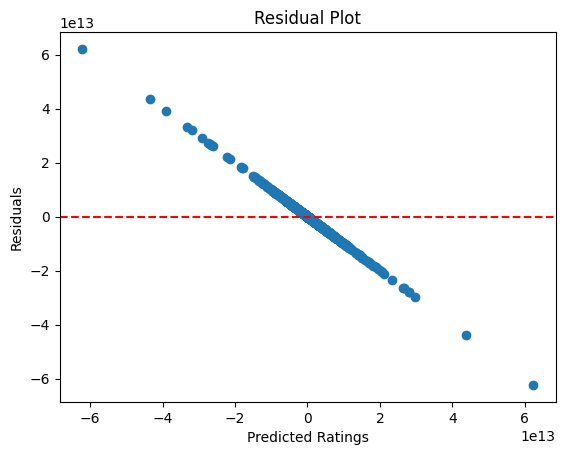

In [15]:
# 2. Residual plot to check for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [16]:
# Feature Importance Analysis
f_scores, _ = f_regression(X_train_scaled, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)

In [17]:
# Display the top N important features
top_features = 6
print(f'Top {top_features} Important Features:')
print(feature_importance.head(top_features))

Top 6 Important Features:
                        Feature     F-Score
299                 Genre_Drama  126.252488
262           Genre_Documentary   68.907199
0                  Genre_Action   65.092448
7527          Actor 1_Dev Anand   64.986277
7808            Actor 1_Govinda   61.771537
7921  Actor 1_Himesh Reshammiya   58.736695
